**Image Blur(Làm mờ hình ảnh)** là làm cho hình ảnh ít rõ nét hoặc ít phân biệt hơn. Nó được thực hiện với sự trợ giúp của nhiều hạt nhân bộ lọc thông thấp. Ưu điểm của việc làm mờ:
- Nó giúp loại bỏ nhiễu. Vì nhiễu được coi là tín hiệu thông cao nên bằng cách áp dụng hạt nhân bộ lọc thông thấp, chúng ta có thể hạn chế nhiễu.
- Nó giúp làm mịn hình ảnh(bằng cách loại bỏ nhiễu và làm mượt biên ảnh)
- Các cạnh có cường độ thấp sẽ bị loại bỏ.
- Nó giúp che giấu chi tiết khi cần thiết. Ví dụ, trong nhiều trường hợp, cảnh sát cố tình muốn che giấu khuôn mặt của nạn nhân, trong những trường hợp như vậy, cần phải làm mờ.

### Các loại Blur

#### Gaussian Blur
Làm mờ Gaussian là kết quả của việc làm mờ một hình ảnh bằng hàm Gaussian, là một bộ lọc tuyến tính.

Hàm cv2.GaussianBlur() trong OpenCV có các tham số đầu vào như sau:

- src: Ảnh nguồn (đầu vào).
- ksize: Kích thước kernel, phải là số lẻ (ví dụ: (3, 3), (5, 5)).
- sigmaX: Độ lệch chuẩn theo hướng X.
- dst (tùy chọn): Ảnh đích (nếu không cung cấp, ảnh nguồn sẽ được thay thế).
- sigmaY (tùy chọn): Độ lệch chuẩn theo hướng Y (nếu không cung cấp, mặc định bằng sigmaX).
- borderType (tùy chọn): Kiểu biên (mặc định là cv2.BORDER_DEFAULT).

Cách hoạt động:

- Kernel được di chuyển qua từng pixel của ảnh. Tại mỗi vị trí, giá trị của pixel mới được tính bằng cách nhân giá trị của các pixel xung quanh với các giá trị tương ứng trong kernel, sau đó cộng lại rồi chia cho tổng các giá trị trong kernel.
- Quá trình này được lặp lại cho tất cả các pixel trong ảnh, tạo ra một ảnh mới đã được làm mờ.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

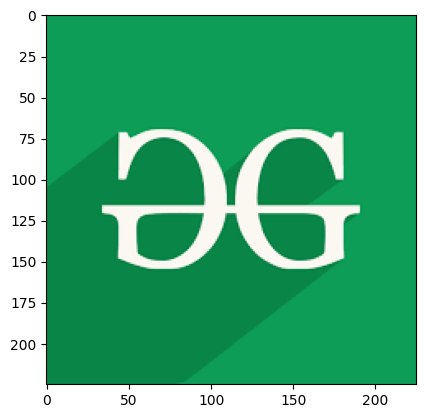

In [2]:
img = cv.imread('../image/se1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

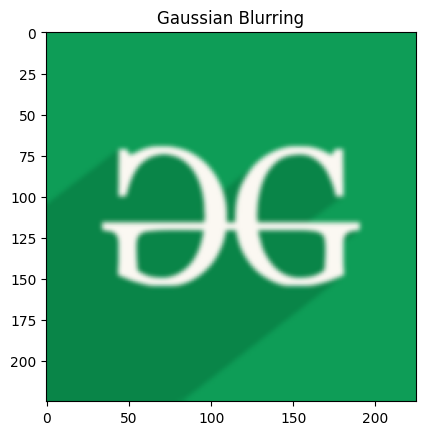

In [9]:
gaussian = cv.GaussianBlur(img, (7,7), 0)#sigmaX = 0 nghĩa là giá trị này sẽ được tính toàn tự động dựa trên kích thước kernel
plt.imshow(gaussian), plt.title("Gaussian Blurring")
plt.show()

#### Median Blur
Median Filter là một kỹ thuật lọc kỹ thuật số phi tuyến tính, thường được sử dụng để loại bỏ nhiễu khỏi hình ảnh hoặc tín hiệu. Nó bảo toàn các cạnh trong khi loại bỏ nhiễu. Đây là một trong những thuật toán tốt nhất để loại bỏ nhiễu muối(điểm nhiễu trắng) và hạt tiêu(điểm nhiễu đen) - là hiện tượng khi các pixel trong ảnh bị thay đỏi đột ngột thành các giá trị cực đại hoặc cực tiểu.

Tham số đầu vào:
- src: Ảnh nguồn (đầu vào).
- ksize: Kích thước của kernel, phải là số lẻ (ví dụ: 3, 5, 7,…).

Cách thức hoạt động:

- Chọn vùng ảnh tương ứng với kernel
- Sắp xếp các giá trị theo thứ tự tăng dần
- Lấy giá trị trung vị

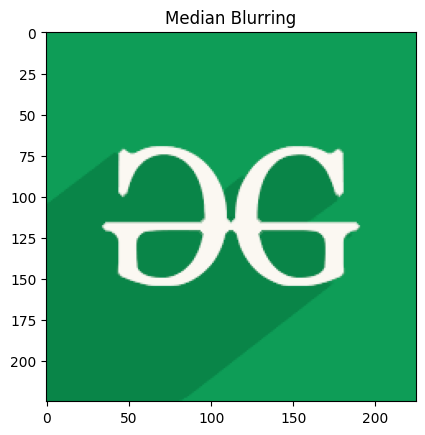

In [10]:
median = cv.medianBlur(img, 5)
plt.imshow(median), plt.title("Median Blurring")
plt.show()

#### Bilateral Blur(Làm mờ song phương)
Bộ lọc song phương là bộ lọc làm mịn phi tuyến tính, bảo toàn cạnh và giảm nhiễu cho hình ảnh. Nó thay thế cường độ của mỗi pixel bằng giá trị cường độ trung bình có trọng số từ các pixel gần đó. Trọng số này có thể dựa trên phân phối Gaussian. Do đó, các cạnh sắc nét được bảo toàn trong khi loại bỏ các cạnh yếu.

Tham số đầu vào:

- `image`: ảnh cần xử lý
- d: Đường kính của mỗi vùng pixel mà bộ lọc sẽ tính toán. Nếu giá trị này là âm, hàm sẽ tự động tính toán dựa trên các giá trị sigma.
- sigmaColor(Intensity Weight): Độ lệch chuẩn trong không gian màu. Giá trị lớn hơn sẽ làm cho các pixel có màu sắc khác nhau trong vùng lân cận được pha trộn nhiều hơn.
- sigmaSpace(Spatial Weight): Độ lệch chuẩn trong không gian tọa độ. Giá trị lớn hơn sẽ làm cho các pixel xa nhau trong không gian tọa độ (nhưng có màu sắc tương tự) được pha trộn nhiều hơn.
- borderType (tùy chọn): Kiểu biên, mặc định là cv2.BORDER_DEFAULT.

Cách thức hoạt động hoạt động bằng cách xem xét cả khoảng cách không gian và sự khác biệt về cường độ giữa các pixel. Nó sử dụng hai thành phần trọng số:

- Trọng số không gian (Spatial Weight): Giống như Gaussian Blur, trọng số này giảm dần theo khoảng cách từ pixel trung tâm.
- Trọng số cường độ (Intensity Weight): Trọng số này giảm dần theo sự khác biệt về cường độ giữa pixel trung tâm và các pixel xung quanh.

Cụ thể:
- Chọn vùng ảnh tương ứng với kernel
- Tính trọng số không gian và cường độ
- Tính giá trị mới cho pixel trung tâm: Giá trị mới của pixel trung tâm được tính bằng cách nhân các giá trị pixel xung quanh với trọng số tương ứng và sau đó cộng lại.

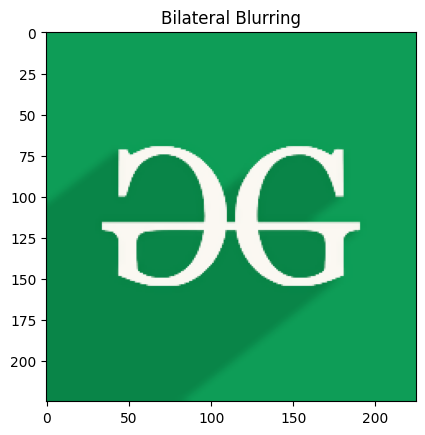

In [12]:
bilateral = cv.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral), plt.title("Bilateral Blurring")
plt.show()

**Nhận xét**
Gaussian Blur

- Ưu điểm: Hiệu quả trong việc loại bỏ nhiễu Gaussian (nhiễu phân bố đều).
- Nhược điểm: Làm mờ các biên ảnh, không giữ được chi tiết biên.

Median Blur

- Ưu điểm: Hiệu quả trong việc loại bỏ nhiễu muối tiêu (salt-and-pepper noise) mà không làm mờ các biên ảnh.
- Nhược điểm: Có thể không hiệu quả với các loại nhiễu khác và có thể làm biến dạng các chi tiết nhỏ trong ảnh.

Bilateral Filter

- Ưu điểm: Giữ lại các biên sắc nét trong khi làm mờ các vùng khác, rất hiệu quả trong việc loại bỏ nhiễu mà không làm mất chi tiết biên.
- Nhược điểm: Tính toán phức tạp hơn và chậm hơn so với Gaussian và Median Blur.

Điểm khác biệt chính giữa Median Blur và Bilateral Filter

- Cách tính toán: Median Blur chỉ dựa trên giá trị trung vị của các pixel xung quanh, trong khi Bilateral Filter xem xét cả khoảng cách không gian và sự khác biệt về cường độ.
- Hiệu quả với các loại nhiễu: Median Blur chủ yếu hiệu quả với nhiễu muối tiêu, trong khi Bilateral Filter hiệu quả với nhiều loại nhiễu khác nhau và giữ lại chi tiết biên tốt hơn.
- Tính toán: Bilateral Filter phức tạp hơn và yêu cầu nhiều tài nguyên tính toán hơn so với Median Blur.